# Домашнее задание

## Задание 2

Для начала напишем разные функции, которые будут строить длины доверительных интервалов.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from typing import Callable


def create_intervals_plot(g, s, lenghts, graph_i, builder: Callable[[float, float, int], float]):
    plt.title(f'γ={g}, σ={s}')
    plt.xlabel('Samples')
    plt.ylabel('Interval length')
    plt.figure(graph_i)
    plt.plot(lenghts, np.vectorize(lambda leng: builder(g, s, leng))(lenghts))


def second_moment(g, s, length):
    sq_sum = np.sum(np.random.normal(0, s, length) ** 2)
    q_minus = stats.chi2.ppf((1 - g) / 2, length)
    q_plus = stats.chi2.ppf((1 + g) / 2, length)
    return sq_sum / q_minus - sq_sum / q_plus


def squared_mean(g, s, length):
    sq_mean = length * np.mean(np.random.normal(0, s, length)) ** 2
    q_minus = stats.norm.ppf((3 - g) / 4)
    q_plus = stats.norm.ppf((3 + g) / 4)
    return sq_mean / q_minus ** 2 - sq_mean / q_plus ** 2


def show_intervals_plot(interval_builder):
    lengths = np.array(range(10, 10000, 25))
    gammas = [0.01, 0.2, 0.9]
    sigmas = [0.2, 0.5, 1]

    for gamma, sigma, graph_i in zip(gammas, sigmas, range(len(gammas))):
        create_intervals_plot(gamma, sigma, lengths, graph_i, interval_builder)
    plt.show()

### Пункт (a)

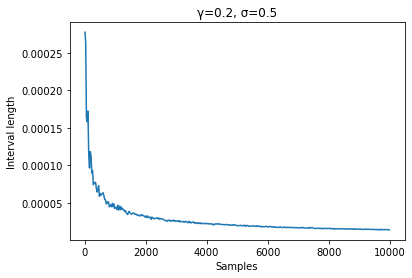

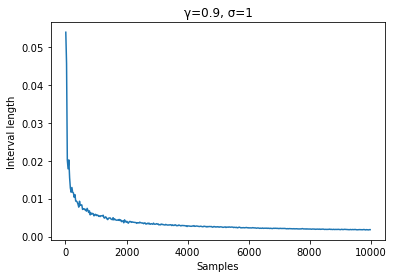

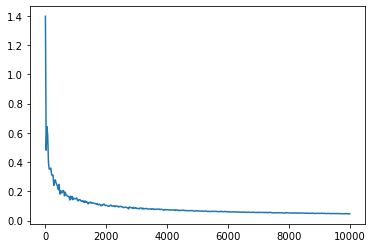

In [59]:
show_intervals_plot(second_moment)

### Пункт (b)

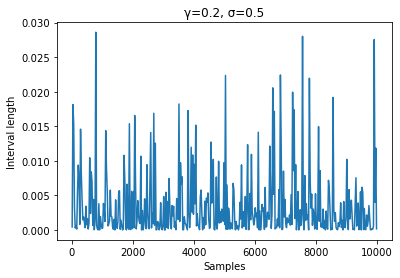

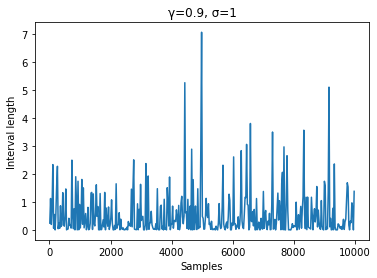

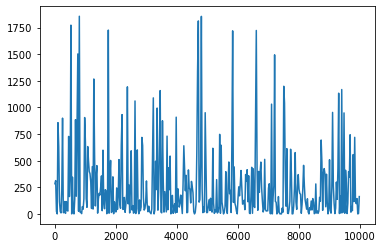

In [60]:
show_intervals_plot(squared_mean)

## Выводы

Из графиков мы видим, что длина доверительных интервалов из первого пункта быстро убывает, и кажется стремится к 0. Длина доверительных интервалов из второго пункта не обладает ни одним из этих свойств: при больших N она может быть большой, поэтому они не приносят много пользы.